## Model Training

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Reyan Alam\Desktop\DS\ML\ML project\notebook\data\stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['average'] = (df['math_score']+df['reading_score']+df['writing_score'])/3

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [6]:
x = df.iloc[:,:5] #independent variable

In [7]:
y = df['average'] #depenedent variable

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the categorical and numerical columns
cat_feature = [columns for columns in df.columns if df[columns].dtypes == 'O' ]  
num_feature = [columns for columns in df.columns if df[columns].dtypes != 'O']  

# Define the transformers for numerical and categorical features
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', cat_transformer, cat_feature),  # Apply OneHotEncoder to categorical features
        ('StandardScaler', num_transformer, num_feature)  # Apply StandardScaler to numerical features
    ])

# Apply the transformations to your feature matrix 'x'
x = preprocessor.fit_transform(df)


In [9]:
ohe_feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_feature)

# Combine numerical feature names with one-hot encoded feature names
new_columns = list(ohe_feature_names) + num_feature

# Create a new DataFrame with transformed data
df_transformed = pd.DataFrame(x, columns=new_columns)

# Optionally reset index and ensure correct column order if needed
df_transformed.reset_index(drop=True, inplace=True)

In [10]:
df_transformed.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,...,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score,average
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.390024,0.193999,0.391492,0.343574
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.192076,1.427476,1.313269,1.021927
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.577711,1.770109,1.642475,1.747064
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744,-1.293830
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.653954,0.605158,0.457333,0.600881


In [11]:
x = df_transformed.iloc[:,:17]

In [12]:
y = df_transformed['average']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Evaluation metrics

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print the model name and evaluation metrics
    print(f"\n{model_name}")
    model_list.append(model_name)
    
    print('Model performance for Training set:')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')

    print('Model performance for Test set:')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    r2_list.append(model_test_r2)
    
    print('=' * 35)



Linear Regression
Model performance for Training set:
- Root Mean Squared Error: 0.8595
- Mean Absolute Error: 0.7017
- R2 Score: 0.2479
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 0.9539
- Mean Absolute Error: 0.7473
- R2 Score: 0.1380

Lasso
Model performance for Training set:
- Root Mean Squared Error: 0.9911
- Mean Absolute Error: 0.7931
- R2 Score: 0.0000
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 1.0369
- Mean Absolute Error: 0.8164
- R2 Score: -0.0185

Ridge
Model performance for Training set:
- Root Mean Squared Error: 0.8558
- Mean Absolute Error: 0.6972
- R2 Score: 0.2543
----------------------------------
Model performance for Test set:
- Root Mean Squared Error: 0.9406
- Mean Absolute Error: 0.7363
- R2 Score: 0.1619

K-Neighbors Regressor
Model performance for Training set:
- Root Mean Squared Error: 0.8227
- Mean Absolute Error: 0.6698
- R2 Score: 0.3109
-----------------

# Linear Regression

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 13.80


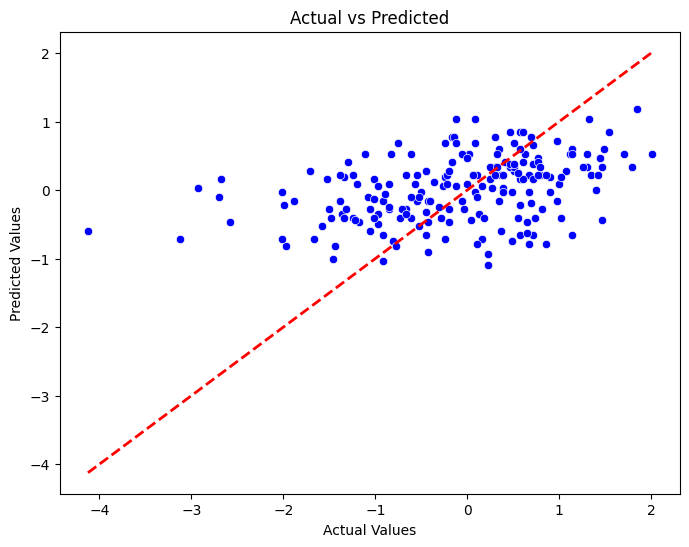

In [18]:
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs. predicted
sns.scatterplot(x=y_test, y=y_pred, color="blue")

# Plotting a diagonal line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Show the plot
plt.show()

In [84]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,1.349408,0.21875,1.130658
737,-0.264605,0.06250,-0.327105
740,0.507315,0.28125,0.226065
660,0.483923,-0.75000,1.233923
411,0.975145,0.71875,0.256395
...,...,...,...
408,-0.896175,-0.06250,-0.833675
332,-0.755826,0.68750,-1.443326
208,0.647664,-0.46875,1.116414
613,0.296791,0.21875,0.078041
